In [1]:
# Import Libraries
import rasterio
import xarray as xr
import netCDF4 as nc
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

from multiprocessing import Pool
from matplotlib.colors import LinearSegmentedColormap
from rasterio.enums import Resampling
from rasterio.warp import reproject, calculate_default_transform, Resampling
from rasterio.transform import from_origin
from rasterio.mask import mask
from shapely.geometry import box


### NetCDF Import (April 5, 2021)

In [ ]:
# Import 2022 S1 Snow Depth (SpicySnow)
# Set file path, filename for NetCDF file
path='/Users/marzi/Desktop/'
fname='BPR_snd2021.nc'

ds = xr.open_dataset(path+fname)

# Extract data for April 6, 2021
date_to_extract = '2021-04-05'
april_5_data = ds.sel(time=date_to_extract)

# Close the dataset
ds.close()

### Plot NetCDF Snow Depth for April 5, 2021 and Export as new NetCDF

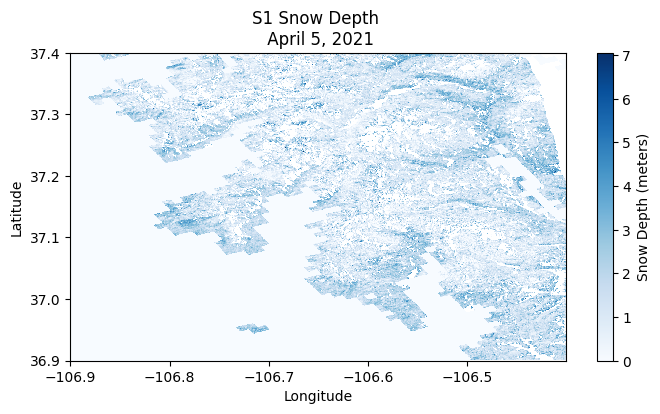

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\marzi\\Desktop\\Apr52021_BPR_snd.nc'

In [ ]:
def plot_and_export_snow_depth(nc_file_path, output_file_path):
    # Import NetCDF file using xarray
    ds = xr.open_dataset(nc_file_path)

    # Extract data for April 5, 2021
    selected_data = '2021-04-05'
    april_5_data = ds.sel(time=selected_data)

    # Extract variables
    x = april_5_data['x']
    y = april_5_data['y']

    # Squeeze the snow_depth variable to remove singleton dimension
    snow_depth = april_5_data['snow_depth'].squeeze()

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(x, y, snow_depth, shading='auto', cmap='Blues')
    plt.colorbar(label='Snow Depth (meters)')
    plt.title('S1 Snow Depth \n April 5, 2021')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Save the extracted data to a new NetCDF file
    april_5_data.to_netcdf(output_file_path)

    # Close the NetCDF dataset
    ds.close()

# Function usage
nc_file_path = '/Users/marzi/Desktop/BPR_snd2021.nc'
output_file_path = '/Users/marzi/Desktop/Apr52021_BPR_snd.nc'
plot_and_export_snow_depth(nc_file_path, output_file_path)



### NetCDF to GeoTIFF Conversion

In [ ]:

def convert_netcdf_to_geotiff(input_nc_path, output_tiff_path, variable_name='snow_depth', time_index=0):
    # Load the NetCDF file
    dataset = xr.open_dataset(input_nc_path)

    # Select the variable and time index
    variable = dataset[variable_name].isel(time=time_index)

    # Add CRS information if not present in the NetCDF file
    if 'crs' not in variable.rio.crs:
        # Assume a common CRS (WGS 84)
        variable.rio.set_crs("EPSG:4326")

    # Save to GeoTIFF
    variable.rio.to_raster(output_tiff_path)

    # Close the NetCDF dataset
    dataset.close()


# Example usage:
input_nc_path = '/Users/marzi/Desktop/Apr52021_BPR_snd.nc'
output_tiff_path = '/Users/marzi/Desktop/Apr52021_BPR_snd.tif'

convert_netcdf_to_geotiff(input_nc_path, output_tiff_path)

